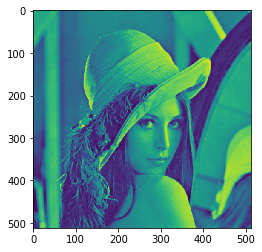

In [21]:
from matplotlib import pyplot as plt
from IPython.display import Image
import numpy as np
import pywt
import cv2

img = cv2.imread("Figures/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.imshow(img)
plt.show()



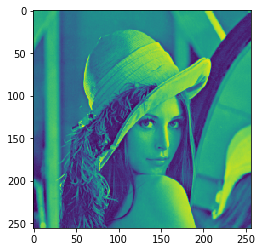

In [30]:
def w2d(img, mode='haar', level=1):    
    coeffs=pywt.wavedec2(img, mode, level=level)
    return coeffs[0]

dwtImg = w2d(img)

plt.figure(1)
plt.imshow(dwtImg)
plt.show()

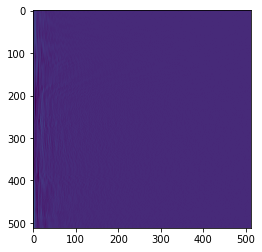

In [32]:
from scipy.fftpack import fft, dct

dctImg = dct(img, 1)

plt.figure(1)
plt.imshow(dctImg)
plt.show()